In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt

## Problem 2

**a) Construct the model assuming all parameters known**

In [4]:
# Converting the string of dice rolls into a numpy array of integers
X = "664153216162115234653214356634261655234232315142464156663246"
X = np.array([[int(i)] for i in X]) - 1

The following code creates an instance of the CategoricalHMM class from the hmmlearn library. This class implements a Hidden Markov Model with categorical (discrete) emissions.

The n_components parameter is set to 2, because we are modeling a system with two possible states: a fair dice and a loaded dice.

The number of features of the model is set to 6, which corresponds to the six possible outcomes of a dice roll.

The startprob_ attribute of the model is set to a numpy array with two elements, representing the initial probabilities of being in each of the two hidden states. These probabilities are set based on the formulas presented on slide 5 of the theoretical class.

The transmat_ attribute and emissionprob_ attribute are set based on the information given in the problem.

Finally, the score method is used to compute the log-likelihood of the last 10 data points in the input data (X[-10:]) given the model parameters.

In [5]:
# Creating a HMM model with two hidden states and six possible observations:
gen_model = hmm.CategoricalHMM(n_components=2)

gen_model.n_features = 6

# Defining the initial probabilities of starting in each hidden state
gen_model.startprob_ = np.array([0.1/0.15, 0.05/0.15])

# Defining the transition matrix that represents the probability of transitioning between states
gen_model.transmat_ = np.array([[0.95, 0.05],
                                [0.1, 0.9]])

# Defining the emission matrix that represents the probability of each observation given each hidden state
gen_model.emissionprob_ = \
    np.array([[1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6],
              [1 / 10, 1 / 10, 1 / 10, 1 / 10, 1 / 10, 1 / 2]])

# Calculating how well the HMM models the problem, in terms of the log-likelihood over the rolls, using the last 10 data points of the sample
gen_model.score(X[-10:])

-16.98461390418157

**b) Train the model assuming the transition probability matrix is unknown. Compare the estimated transition matrix with the original one. Visualize the generated dice series against the given one.**

In [6]:
Z = "LLLLLLLLLLLLLLFFFFFFLLLLLLLLLLLLLLFFFFFFFFFFFFFFFFFFLLLLLLLL"
Z = np.array([0 if x == "F" else 1 for x in Z])

The following code searches for the best model based on the log-likelihood score with the transition matrix as an unknown parameter.

In [7]:
Xtrain = X[:-10]
Xvalidate = X[-10:]
nruns = 50
best_score = best_model = None
for idx in range(nruns):
  mdl = hmm.CategoricalHMM(n_components = 2, init_params = "t", n_iter = 1000, tol = 0.001)
  mdl.n_features = 6
  mdl.startprob_ = np.array([0.1/0.15, 0.05/0.15])
  mdl.emissionprob_ = \
    np.array([[1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6],
              [1 / 10, 1 / 10, 1 / 10, 1 / 10, 1 / 10, 1 / 2]])
  mdl.fit(Xtrain)
  score = mdl.score(Xvalidate)
  print(f'Model #{idx}\tScore: {score}')
  if best_score is None or score > best_score:
      best_model = mdl
      best_score = score


Model #0	Score: -19.262258113892415
Model #1	Score: -17.399630489567603
Model #2	Score: -19.066573588597667
Model #3	Score: -17.596566327852614
Model #4	Score: -18.430253517022827
Model #5	Score: -18.933669831187196
Model #6	Score: -18.438450169258463
Model #7	Score: -18.89993099591923
Model #8	Score: -18.42973104299367
Model #9	Score: -18.42774943983544
Model #10	Score: -18.435421131059424
Model #11	Score: -18.43068106271448
Model #12	Score: -19.008199281331695
Model #13	Score: -19.24549678423036
Model #14	Score: -18.801356570594926
Model #15	Score: -19.322594478769343
Model #16	Score: -18.438709152486204
Model #17	Score: -18.430873479173965
Model #18	Score: -18.419050079548867
Model #19	Score: -19.215583571783576
Model #20	Score: -64.65332229319576
Model #21	Score: -18.43832138079553
Model #22	Score: -18.41523319318457
Model #23	Score: -18.42061394593877
Model #24	Score: -19.62302138001411
Model #25	Score: -19.08919916092966
Model #26	Score: -18.43019165119453
Model #27	Score: -48.95

In [8]:
# print the estimated transition matrix
print("Estimated Transition Matrix:")
print(best_model.transmat_)

# print the original transition matrix for comparison
print("Original Transition Matrix:")
print(np.array([[0.95, 0.05], [0.1, 0.9]]))

Estimated Transition Matrix:
[[4.17695007e-04 9.99582305e-01]
 [8.93774547e-01 1.06225453e-01]]
Original Transition Matrix:
[[0.95 0.05]
 [0.1  0.9 ]]


Comparing the estimated transition matrix to the original transition matrix, we can see that there are some differences between the two. The values in the estimated matrix are different from the original matrix, indicating that the model has learned different transition probabilities from the training data. The biggest difference is that the estimated transition matrix has a very low probability of staying in the same state and a high probability of changing states. In contrast, the original transition matrix has a much higher probability of staying in the same state and a lower probability of changing states. This difference in transition probabilities may be due to the fact that the estimated transition matrix was learned from a limited amount of data, while the original transition matrix is assumed to be known.

In [9]:
states = best_model.predict(Xvalidate)

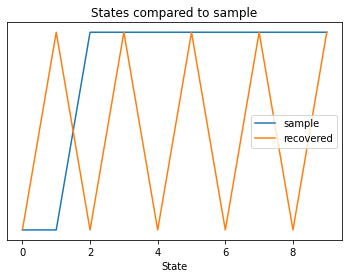

In [10]:
# plot our recovered states compared to generated (aim 1)
fig, ax = plt.subplots()
ax.plot(Z[-10:], label='sample')
ax.plot(states, label='recovered')
ax.set_yticks([])
ax.set_title('States compared to sample')
ax.set_xlabel('Time (# rolls)')
ax.set_xlabel('State')
ax.legend()
fig.show()

The model is predicting that the first roll was from a fair die, and the second roll was from a loaded die. After that, the model predicts that the die switched back and forth between fair and loaded with each subsequent roll.

Comparing this to the actual sample, it seems that the model correctly predicted the first roll as being from a fair dice, but then started to make incorrect predictions. It predicted that the remaining rolls alternated between loaded and fair, whereas the actual sample shows that after the first roll the rolls were all from the loaded die.

Overall, it seems that the model is not performing well on this particular sample.

**c) Train HMM’s with half of the data points and observe the log-likelihood with the remaining half. Compare the estimated parameters (transition and emission matrices) with the original model from question a). Visualize the generated dice series of the last half of data against the given one. (Note: Use the dataset provided in files rolls.txt and dice.txt provided on Moodle):**

**(i) Assume both transition and emission matrices are unknown:**

In [11]:
with open('/content/drive/MyDrive/AAA/Week 4/rolls.txt', 'r') as f:
    rolls = f.read()
rolls_arr = np.array([[int(i) - 1] for i in rolls.split("\n") if i])

In [12]:
with open('/content/drive/MyDrive/AAA/Week 4/dice.txt', 'r') as f:
    dice = f.read()
dice_arr = np.array([1 if c == "L" else 0 for c in dice.split("\n") if c])

In the following code we will split the data into training and test sets, train an HMM model with both transition and emission matrices unknown and evaluate the log-likelihood of the test data.

In [13]:
# Split the data in half
n = len(rolls_arr) // 2
X_train, X_test = rolls_arr[:n], rolls_arr[n:]
Z_train, Z_test = dice_arr[:n], dice_arr[n:]

# Train an HMM with both transition and emission matrices unknown
model_c = hmm.CategoricalHMM(n_components=2)

model_c.n_features = 6

model_c.startprob_ = np.array([0.1/0.15, 0.05/0.15])

# Fit the model to the training data
model_c.fit(X_train)

# Evaluate the log-likelihood of the test data
ll_test = model_c.score(X_test)

# Compare the estimated parameters with the original model
print("Original model:")
print("Transition matrix:", gen_model.transmat_)
print("Emission matrix:", gen_model.emissionprob_)
print("\nEstimated model:")
print("Transition matrix:", model_c.transmat_)
print("Emission matrix:", model_c.emissionprob_)
print("\nLog-likelihood on test data:", ll_test)

Original model:
Transition matrix: [[0.95 0.05]
 [0.1  0.9 ]]
Emission matrix: [[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.1        0.1        0.1        0.1        0.1        0.5       ]]

Estimated model:
Transition matrix: [[0.51052183 0.48947817]
 [0.04961459 0.95038541]]
Emission matrix: [[0.21551479 0.10092728 0.21901643 0.35151073 0.09693504 0.01609574]
 [0.1401267  0.11998864 0.1337343  0.11383433 0.15455245 0.33776357]]

Log-likelihood on test data: -966.3065001706955


The original model has a transition matrix with a high probability of staying in the same state and a low probability of transitioning to the other state, while the estimated model shows a higher transition probability from state 1 to state 2 and a lower probability of staying in state 1 compared to the original model

The estimated model's emission matrix also exhibits dissimilarities from the original model. While the probabilities of the first state are relatively uniform across different dice outcomes in the original model, the estimated model shows a more varied distribution. On the other hand, the second state in both models is skewed towards the outcome six, indicating a similar pattern.

In [14]:
# Predict states on test set
predicted_states = model_c.predict(X_test)

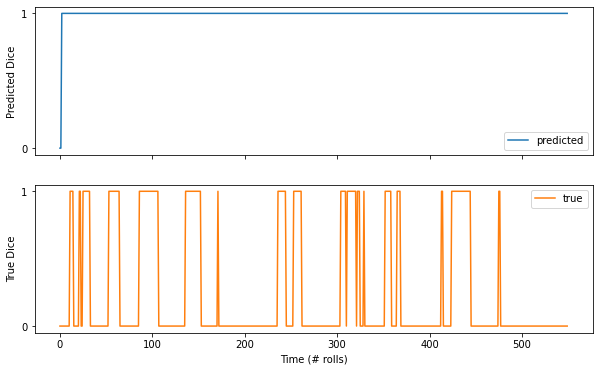

In [15]:
# Plot predicted dice series against true dice series
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(10, 6))

# Plot predicted dice series
ax1.plot(predicted_states, label='predicted', color='C0')
ax1.set_ylabel('Predicted Dice')
ax1.set_yticks([0, 1])
ax1.legend()

# Plot true dice series
ax2.plot(Z_test, label='true', color='C1')
ax2.set_ylabel('True Dice')
ax2.set_xlabel('Time (# rolls)')
ax2.set_yticks([0, 1])
ax2.legend()

plt.show()


From the plot, it is evident that the predicted sequence did not change significantly, possibly due to the high probability of staying in state 2 (0.95) in the transition matrix, leading to a stagnation in that state. Therefore, this model may not be a good fit for the given data, as it fails to capture the underlying patterns in the sequence.

**c) (ii) Assume all the parameters unknown, including the number of states (suggestion: try with the number of states from 1 to 4 and compare the resulting log-likehoods).**

In the following code, we will train an HMM model with unknown parameters, including the number of states. We will first try with a range of states from 1 to 4 and compare the resulting log-likelihoods.

In [16]:
# Create an empty list to store log-likelihoods for different number of states
log_likelihoods = []

# Iterate over different number of states (from 1 to 4)
for n_states in range(1, 5):
    # Create an HMM model with the specified number of states, assuming all parameters are unknown
    # Train an HMM with both transition and emission matrices unknown
    model = hmm.CategoricalHMM(n_components=n_states)

    # Fit the model on the training data
    model.fit(X_train)

    # Calculate the log-likelihood on the testing data
    log_likelihood = model.score(X_test)

    # Append the log-likelihood to the list of log-likelihoods
    log_likelihoods.append(log_likelihood)


# Create a HMM model with all parameters unknown
final_model = hmm.CategoricalHMM()
final_model.fit(X_train)

# Evaluate the log-likelihood of the test data
ll_test = final_model.score(X_test)

In [17]:
log_likelihoods

[-969.3308570167918, -969.8010136779775, -960.0854890803073, -972.787131651312]

Based on these values, it seems that the model with 3 states provides the best fit to the data, as it has the highest log-likelihood.

In [18]:
# Compare the estimated parameters with the original model
print("Original model:")
print("Transition matrix:", gen_model.transmat_)
print("Emission matrix:", gen_model.emissionprob_)
print("\nEstimated model:")
print("Transition matrix:", final_model.transmat_)
print("Emission matrix:", final_model.emissionprob_)
print("\nLog-likelihood on test data:", ll_test)

Original model:
Transition matrix: [[0.95 0.05]
 [0.1  0.9 ]]
Emission matrix: [[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.1        0.1        0.1        0.1        0.1        0.5       ]]

Estimated model:
Transition matrix: [[1.]]
Emission matrix: [[0.14727273 0.11818182 0.14181818 0.13636364 0.14909091 0.30727273]]

Log-likelihood on test data: -969.3308570167918


The original model had a more complex transition matrix with probabilities for both states to transition to each other, while the estimated model has a simple transition matrix with only one state transitioning to itself with probability 1. The emission matrices are different as well, with the estimated model having generally lower probabilities.

In [19]:
# Convert the predicted sequence of dice rolls to an array of integers
predicted_rolls = final_model.predict(X_test)

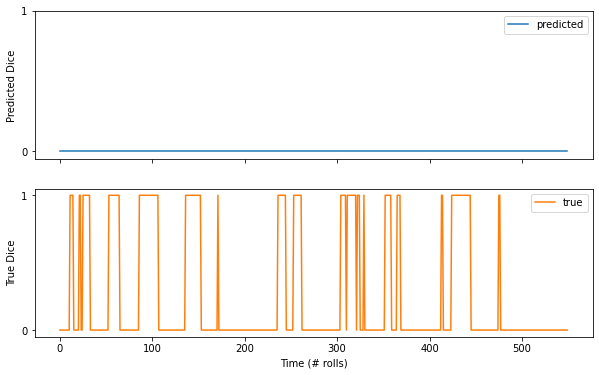

In [20]:
# Plot predicted dice series against true dice series
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(10, 6))

# Plot predicted dice series
ax1.plot(predicted_rolls, label='predicted', color='C0')
ax1.set_ylabel('Predicted Dice')
ax1.set_yticks([0, 1])
ax1.legend()

# Plot true dice series
ax2.plot(Z_test, label='true', color='C1')
ax2.set_ylabel('True Dice')
ax2.set_xlabel('Time (# rolls)')
ax2.set_yticks([0, 1])
ax2.legend()

plt.show()

The estimated HMM model has a transition matrix with a value of 1, which means that the model predicts that the dice will always stay in the same state. This can be seen in the plot of predicted versus true dice series, where the predicted series is a straight line. This result indicates that the model is not capturing the complexity of the data and is making overly simplistic predictions. 

**d) Generate 30000 samples from the model of question a). Repeat question c) using this new dataset. (Note: you don’t need to visualize the dice states.)**

In [21]:
# Simulate the loaded dice rolls
rolls, gen_states = gen_model.sample(30000)

In [22]:
# Split the data in half
n = len(rolls) // 2
X_train, X_test = rolls[:n], rolls[n:]
Z_train, Z_test = gen_states[:n], gen_states[n:]

In [23]:
# Train an HMM with both transition and emission matrices unknown
model_c = hmm.CategoricalHMM(n_components=2)

model_c.n_features = 6

model_c.startprob_ = np.array([0.1/0.15, 0.05/0.15])

# Fit the model to the training data
model_c.fit(X_train)

# Evaluate the log-likelihood of the test data
ll_test = model_c.score(X_test)

# Compare the estimated parameters with the original model
print("Original model:")
print("Transition matrix:", gen_model.transmat_)
print("Emission matrix:", gen_model.emissionprob_)
print("\nEstimated model:")
print("Transition matrix:", model_c.transmat_)
print("Emission matrix:", model_c.emissionprob_)
print("\nLog-likelihood on test data:", ll_test)

Original model:
Transition matrix: [[0.95 0.05]
 [0.1  0.9 ]]
Emission matrix: [[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.1        0.1        0.1        0.1        0.1        0.5       ]]

Estimated model:
Transition matrix: [[0.70473733 0.29526267]
 [0.20713911 0.79286089]]
Emission matrix: [[0.13668782 0.10517479 0.10970733 0.03372116 0.11261033 0.50209857]
 [0.15423225 0.1669193  0.16056467 0.22508495 0.1764494  0.11674942]]

Log-likelihood on test data: -26228.372006261925


The estimated model's transition matrix shows a significant deviation from the original model, with a lower probability of staying in state 1 and a higher probability of transitioning to state 2. The emission matrix of the original model also differs from the estimated model, with a higher probability for the second state's sixth dice outcome. The probabilities of the first state in the estimated model are more varied across different dice outcomes than the original model.

In [24]:
# Create an empty list to store log-likelihoods for different number of states
log_likelihoods = []

# Iterate over different number of states (from 1 to 4)
for n_states in range(1, 5):
    # Create an HMM model with the specified number of states, assuming all parameters are unknown
    # Train an HMM with both transition and emission matrices unknown
    model = hmm.CategoricalHMM(n_components=n_states)

    # Fit the model on the training data
    model.fit(X_train)

    # Calculate the log-likelihood on the testing data
    log_likelihood = model.score(X_test)

    # Append the log-likelihood to the list of log-likelihoods
    log_likelihoods.append(log_likelihood)


# Create a HMM model with all parameters unknown
final_model = hmm.CategoricalHMM()
final_model.fit(X_train)

# Evaluate the log-likelihood of the test data
ll_test = final_model.score(X_test)

In [25]:
log_likelihoods

[-26310.709174046875,
 -26329.464653692048,
 -26319.620105181595,
 -26256.36372508711]

In [26]:
# Compare the estimated parameters with the original model
print("Original model:")
print("Transition matrix:", gen_model.transmat_)
print("Emission matrix:", gen_model.emissionprob_)
print("\nEstimated model:")
print("Transition matrix:", final_model.transmat_)
print("Emission matrix:", final_model.emissionprob_)
print("\nLog-likelihood on test data:", ll_test)

Original model:
Transition matrix: [[0.95 0.05]
 [0.1  0.9 ]]
Emission matrix: [[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.1        0.1        0.1        0.1        0.1        0.5       ]]

Estimated model:
Transition matrix: [[1.]]
Emission matrix: [[0.147      0.14146667 0.1396     0.1462     0.15013333 0.2756    ]]

Log-likelihood on test data: -26310.709174046875


The estimated model shows a significant difference from the original model in both the transition and emission matrices. In the original model, the transition matrix had a relatively low probability of transitioning from state 1 to state 2 and a high probability of staying in state 1. In contrast, the estimated model has a transition matrix where the only probability is the one of transitioning to the same state.

The log-likelihood on test data for the estimated model is -26310.709174046875. This value is lower than the log-likelihood of the original model, which suggests that the estimated model is not as good at predicting the observed data as the original model. Therefore, it may not be appropriate to use the estimated model for making predictions.